In [1]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use("ggplot")

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) # Adjusts the configuration of the plots we will create

In [2]:
# Read in the data

movies_df = pd.read_csv("movies.csv")
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# lets see if there is any missing data

movies_df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull()) 
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Let's see the rows with these null values

movies_df[movies_df.isna().any(axis = 1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
# The rows with the null values are quite much. So let's drop them and check the shape of the data

movies_df = movies_df.dropna()
movies_df.shape

(5421, 15)

In [7]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# Data types for our columns

movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Change Data types of columns 
movies_df["budget"] = movies_df["budget"].astype("int64")
movies_df["gross"] = movies_df["gross"].astype("int64")

In [10]:
movies_df["released"]

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

In [11]:
country = movies_df["country"].unique()
country

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Italy', 'South Korea', 'Sweden', 'Spain',
       'Hong Kong', 'Mexico', 'Switzerland', 'France', 'New Zealand',
       'Japan', 'Yugoslavia', 'Ireland', 'Germany', 'Austria', 'Portugal',
       'China', 'Taiwan', 'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Iran', 'Czech Republic',
       'Denmark', 'Jamaica', 'Brazil', 'Aruba', 'Argentina', 'India',
       'Netherlands', 'Colombia', 'Norway', 'Israel', 'Belgium',
       'United Arab Emirates', 'Indonesia', 'Hungary', 'Kenya', 'Iceland',
       'Chile', 'Finland', 'Panama', 'Malta', 'Lebanon', 'Thailand'],
      dtype=object)

In [12]:
# cleaning unnecessary country name from released column
for i in country:
    movies_df["released"] = movies_df["released"].str.replace(i,"",regex=False)
    movies_df["released"] =  movies_df["released"].str.replace("()","",regex=False)

In [13]:
for i in ["(Greece)","(Singapore)","(Poland)","(Latvia)","(Philippines)","(Turkey)","(Bahrain)","(Malaysia)","(Croatia)","(Bulgaria)",
         "(Bahamas)"]:
    movies_df["released"] =  movies_df["released"].str.replace(i,"",regex=False)
    movies_df["released"] =  movies_df["released"].str.replace("()","",regex=False)

In [14]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [15]:
# Converting Date Into Default Format
movies_df["released"] = pd.to_datetime(movies_df["released"])

In [16]:
movies_df["released"]

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7648   2020-01-17
7649   2020-02-14
7650   2020-01-17
7651   2020-02-21
7652   2020-08-28
Name: released, Length: 5421, dtype: datetime64[ns]

In [17]:
movies_df[["year","released"]].head(20) # released column's year and year column not matching

,year,released
0,1980,1980-06-13
1,1980,1980-07-02
2,1980,1980-06-20
3,1980,1980-07-02
4,1980,1980-07-25
5,1980,1980-05-09
6,1980,1980-06-20
7,1980,1980-12-19
8,1980,1981-06-19
9,1980,1980-05-16


In [18]:
# Creating correct year column because released column's year and year column not matching

movies_df["Year_Corrected"] = pd.DatetimeIndex(movies_df["released"]).year

In [19]:
# Droping year column
movies_df.drop(columns =["year"],inplace=True)

In [20]:
movies_df = movies_df.sort_values(by="gross",ascending=False)
movies_df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Corrected
5445,Avatar,PG-13,Action,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015-01-15,5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1994-06-04,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2001-05-11,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982-03-12,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [21]:
# pd.set_option("display.max_rows",None) # To display whole dataframe

In [22]:
# Drop any duplicate

movies_df.drop_duplicates().head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Corrected
5445,Avatar,PG-13,Action,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019-07-19,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015-06-12,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012-05-04,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015-04-03,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019-11-22,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


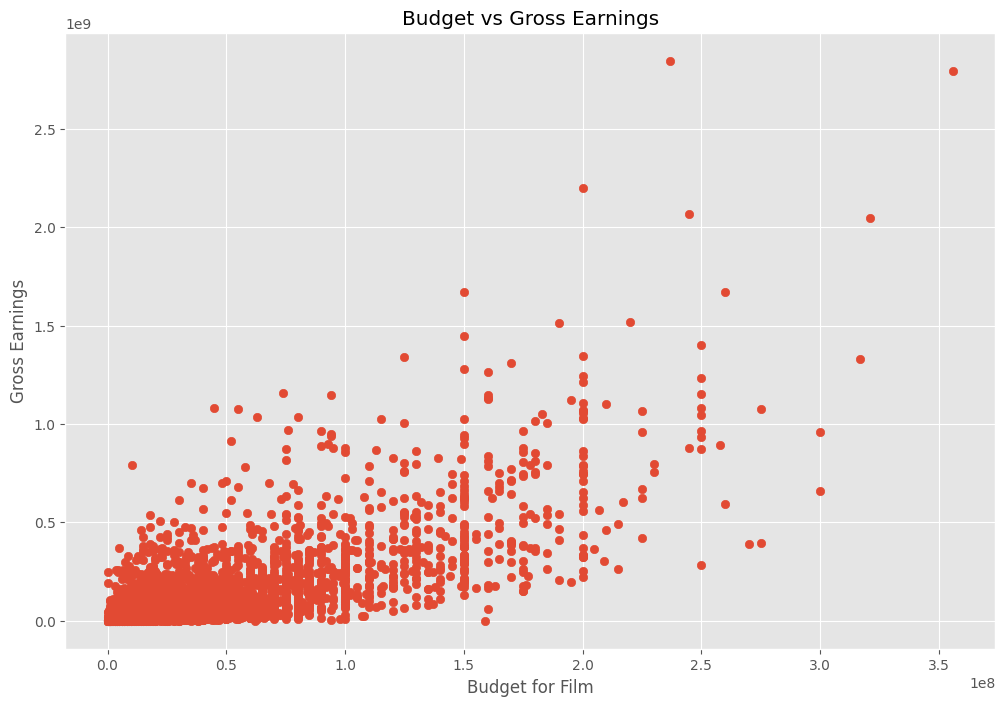

In [23]:
# Scatter plot with Budget vs Gross

plt.scatter(x=movies_df["budget"],y=movies_df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

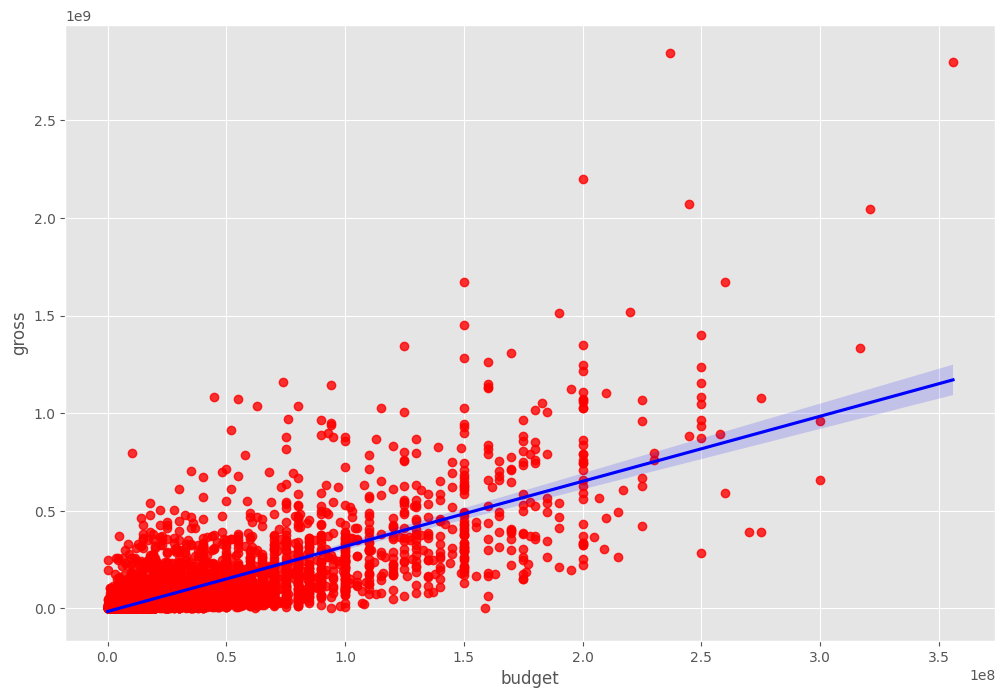

In [24]:
# Plot Budget vs Gross using Seaborn 

sns.regplot(x="budget",y="gross",data=movies_df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [25]:
movies_df.corr(method="pearson") # 'pearson', 'kendall', 'spearman' # It only takes numeric columns

,score,votes,budget,gross,runtime,Year_Corrected
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
Year_Corrected,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


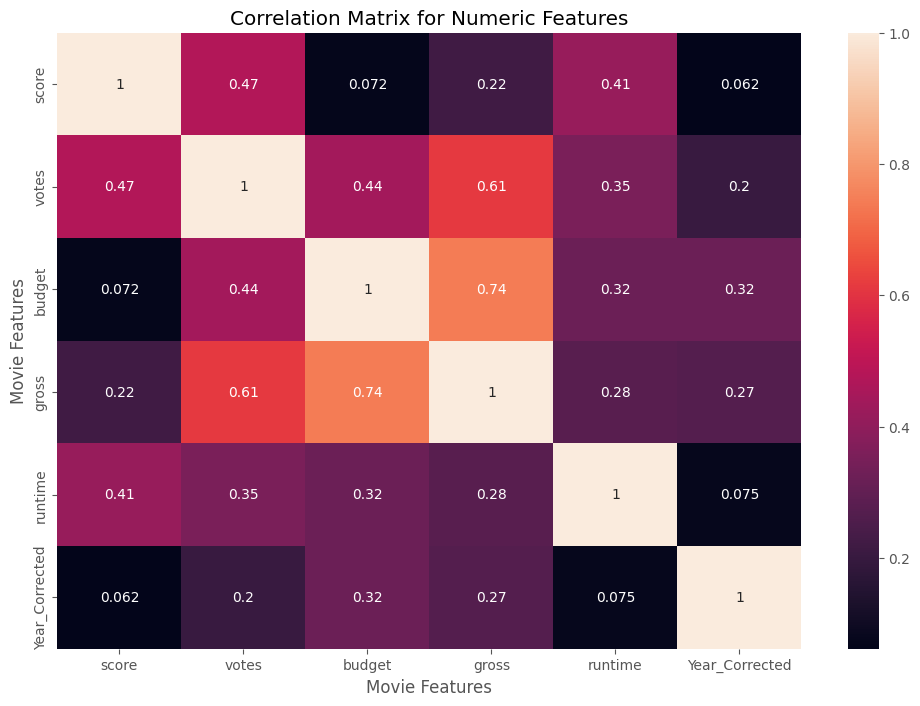

In [26]:
correlation_matrix = movies_df.corr(method="pearson")

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [27]:
movies_numerized_df = movies_df.copy()

for col_name in movies_numerized_df.columns:
    if (movies_numerized_df[col_name].dtype) == "object":
        movies_numerized_df[col_name] = movies_numerized_df[col_name].astype("category")
        movies_numerized_df[col_name] = movies_numerized_df[col_name].cat.codes
        
movies_numerized_df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Corrected
5445,386,5,0,2009-12-18,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019-04-26,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997-12-19,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015-12-18,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018-04-27,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2015-01-15,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1994-06-04,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2001-05-11,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982-03-12,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982


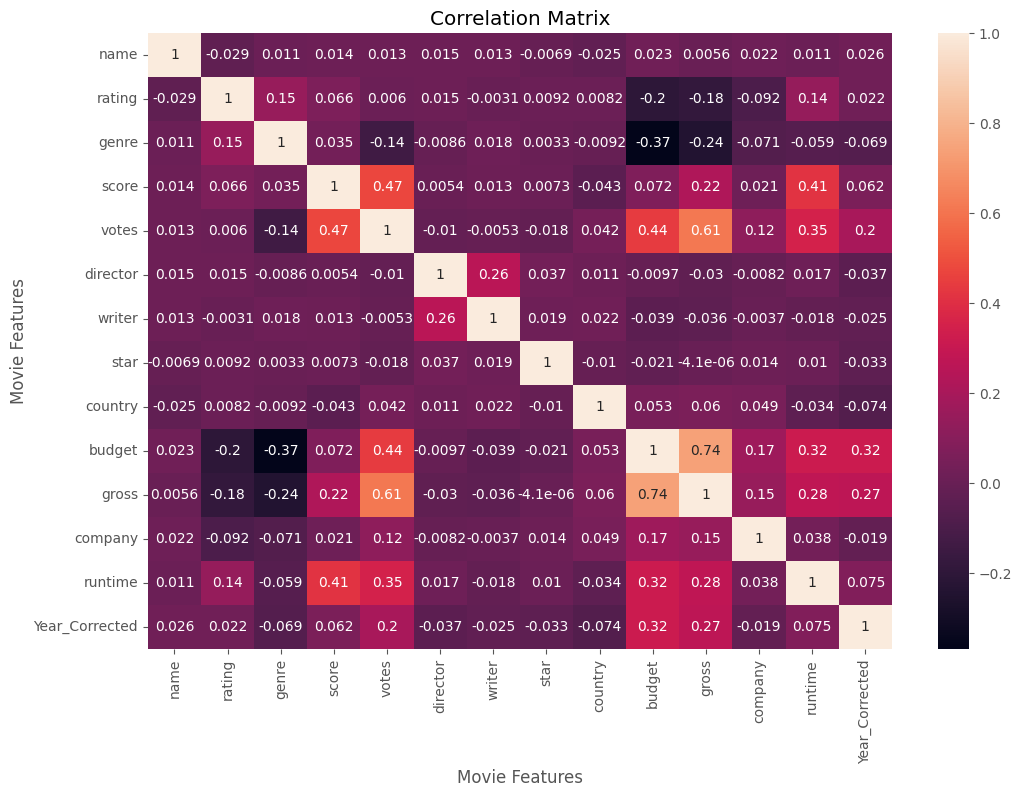

In [29]:
correlation_matrix = movies_numerized_df.corr(method="pearson")

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [54]:
correlation_mat = movies_numerized_df.corr(method="pearson")

corr_pairs = correlation_mat.unstack()

writer  company          -0.003697
        runtime          -0.017561
        Year_Corrected   -0.025495
star    name             -0.006882
        rating            0.009196
dtype: float64

In [56]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(10)

genre   budget   -0.368523
budget  genre    -0.368523
genre   gross    -0.244101
gross   genre    -0.244101
rating  budget   -0.203946
budget  rating   -0.203946
rating  gross    -0.181906
gross   rating   -0.181906
genre   votes    -0.135990
votes   genre    -0.135990
dtype: float64

In [57]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr 

gross           votes             0.614751
votes           gross             0.614751
budget          gross             0.740247
gross           budget            0.740247
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
Year_Corrected  Year_Corrected    1.000000
dtype: float64